In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [0]:
env = gym.make("FrozenLake-v0")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 10000
learning_rate = 0.1
max_steps = 99
discount = 0.94
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
decay_rate = 0.001

In [0]:
q_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [8]:
rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):
    # env.render()

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    if reward == 0 and done == True:
      reward = -1
    elif done == False:
      reward = 0
    else:
      reward = 1

    # Update q-table
    q_table[state, action] = q_table[state, action] + learning_rate * (reward + 
                  discount * np.max(q_table[new_state, :]) - q_table[state, action])
    state = new_state

    cumul_rewards += reward
    if reward > 0:
      steps_till_success.append(step + 1)

    if done == True:
      break

  # env.render()
  if cumul_rewards < 1:
    steps_till_success.append(max_steps + 1)
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  rewards.append(cumul_rewards)
  # print("**********************************************************************")

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')
print(f'Min step to success: {min(steps_till_success)}')

Average reward:-0.3744
Min step to success: 6


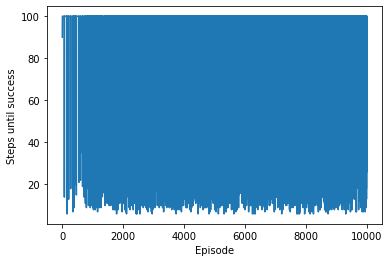

In [9]:
plt.plot(steps_till_success)
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

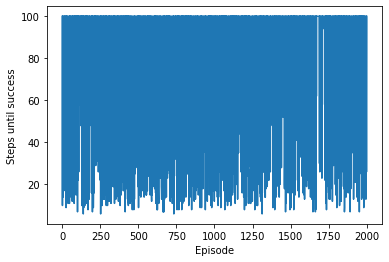

In [10]:
plt.plot(steps_till_success[7999:10000])
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

In [11]:
print(q_table)

[[ 0.11455872  0.08693176  0.10332296  0.08430843]
 [-0.09932226 -0.06549659 -0.16973612  0.07858034]
 [-0.02526165 -0.10383939 -0.04051943  0.05428363]
 [-0.38686588 -0.14254569 -0.2925412   0.04104946]
 [ 0.15187517 -0.13541747 -0.14831234 -0.14474465]
 [ 0.          0.          0.          0.        ]
 [-0.59357547 -0.55153443 -0.1159228  -0.65487069]
 [ 0.          0.          0.          0.        ]
 [-0.38092747 -0.26034517 -0.19263593  0.23039596]
 [-0.23245738  0.33768099 -0.19899254 -0.37917141]
 [ 0.33063448 -0.19321759 -0.06095841 -0.22132438]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.08622593 -0.10158911  0.52752725  0.16245324]
 [ 0.45945929  0.82899345  0.60432935  0.47827513]
 [ 0.          0.          0.          0.        ]]


In [12]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 41
****************************************************
EPISODE  1
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 47
****************************************************
EPISODE  2
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 20
****************************************************
EPISODE  3
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 56
****************************************************
EPISODE  4
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 21


In [15]:
total_reward = 0
steps = []

for episode in range(100):
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
          if reward > 0:
            steps.append(step + 1)
          # else:
          #   step.append(max_steps + 1)
          break
        state = new_state
env.close()

print(f'Successful runs out of 100: {total_reward}')
print(f'Average steps: {np.mean(steps)}')

Successful runs out of 100: 80.0
Average steps: 38.25
